In [7]:
import pandas as pd 
import numpy as np
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
from wordcloud import WordCloud

In [8]:
#import the dataset
df = pd.read_csv('tweets_sport.csv')

In [9]:
df = df.replace(' ',np.nan)
df.dropna(subset=['likes'], inplace=True) ###
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13522 entries, 0 to 13522
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                13522 non-null  float64
 1   text              13522 non-null  object 
 2   event_number      13522 non-null  int64  
 3   player_dummy      13522 non-null  int64  
 4   team_dummy        13522 non-null  int64  
 5   weekday           13522 non-null  int64  
 6   month             13522 non-null  int64  
 7   day               13522 non-null  int64  
 8   time              13522 non-null  object 
 9   user_screen_name  13522 non-null  object 
 10  retweets          13522 non-null  float64
 11  likes             13522 non-null  float64
 12  comments          13522 non-null  float64
 13  Unnamed: 13       1 non-null      object 
dtypes: float64(4), int64(6), object(4)
memory usage: 1.5+ MB


In [10]:
df.isnull().sum()

id                      0
text                    0
event_number            0
player_dummy            0
team_dummy              0
weekday                 0
month                   0
day                     0
time                    0
user_screen_name        0
retweets                0
likes                   0
comments                0
Unnamed: 13         13521
dtype: int64

In [11]:
df.dropna(subset=['likes'], inplace=True)
df.drop(['Unnamed: 13'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13522 entries, 0 to 13522
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                13522 non-null  float64
 1   text              13522 non-null  object 
 2   event_number      13522 non-null  int64  
 3   player_dummy      13522 non-null  int64  
 4   team_dummy        13522 non-null  int64  
 5   weekday           13522 non-null  int64  
 6   month             13522 non-null  int64  
 7   day               13522 non-null  int64  
 8   time              13522 non-null  object 
 9   user_screen_name  13522 non-null  object 
 10  retweets          13522 non-null  float64
 11  likes             13522 non-null  float64
 12  comments          13522 non-null  float64
dtypes: float64(4), int64(6), object(3)
memory usage: 1.4+ MB


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\j4072\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


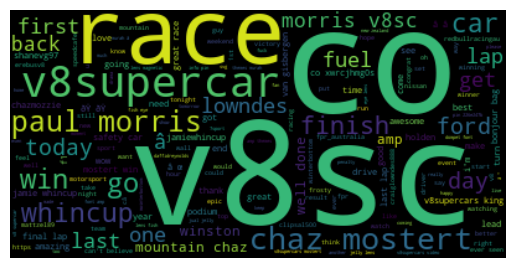

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


# Create stopword list:
stop_words = set(stopwords.words('english'))
stop_words.update(["rt", "bathurst","bathurst1000", "adelaide","http","tas","tcm","darwin","coateshire","sandown","clipsal","sydney", "townsville"])
textt = " ".join(review for review in df.text)


# Create word cloud
wordcloud = WordCloud(stopwords=stop_words).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [13]:
event_11 = df[df['event_number'] == 11]
event_11.dropna(inplace=True) # drop rows containing NaN values
len(event_11)

C:\Users\j4072\AppData\Local\Temp\ipykernel_3828\2413311232.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



9619

In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()


In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()


event_11[['neg', 'neu', 'pos', 'compound']] = event_11['text'].apply(lambda x: pd.Series(sentiment.polarity_scores(x)))
event_11.head(100)

C:\Users\j4072\AppData\Local\Temp\ipykernel_3828\334461600.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\j4072\AppData\Local\Temp\ipykernel_3828\334461600.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\j4072\AppData\Local\Temp\ipykernel_3828\334461600.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,id,text,event_number,player_dummy,team_dummy,weekday,month,day,time,user_screen_name,retweets,likes,comments,neg,neu,pos,compound
0,5.210000e+17,"""rt @dariofranchitti: this bathurst race has b...",11,0,0,7,10,12,7:28,007_dot,0.0,0.0,0.0,0.0,0.644,0.356,0.8881
1,5.210000e+17,"""rt @wtf1couk: gp3 fans while you're waiting f...",11,0,0,7,10,12,7:28,007_dot,0.0,0.0,0.0,0.0,0.862,0.138,0.4939
2,5.210000e+17,"""rt @sally_fitz: incredible final laps of #bat...",11,1,0,7,10,12,7:31,007cnt,0.0,0.0,0.0,0.0,0.833,0.167,0.5574
3,5.210000e+17,"""rt @v8supercars: top 10 - mostert, moffat, pe...",11,0,0,7,10,12,9:04,007pixxx,0.0,0.0,0.0,0.0,0.893,0.107,0.2023
4,5.210000e+17,"""#bathurst1000 i present to you, the fully st...",11,0,0,7,10,12,10:20,007pixxx,0.0,0.0,0.0,0.0,0.871,0.129,0.1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,5.210000e+17,"""to put what happened to svg into perspective,...",11,0,0,7,10,12,7:09,4theloveofindy,0.0,0.0,0.0,0.0,1.000,0.000,0.0000
123,5.210000e+17,"""big day: charlotte, bathurst, fuji, motegi an...",11,0,0,7,10,12,18:09,4theloveofindy,0.0,1.0,0.0,0.0,1.000,0.000,0.0000
124,5.210000e+17,"""blanchard in the wall. safety car throws a mo...",11,0,0,7,10,12,7:03,4theloveofindy,0.0,0.0,0.0,0.0,0.865,0.135,0.4215
128,5.210000e+17,"""more real than most reality tv #bathurst1000""",11,0,0,7,10,12,7:09,50shadesofteal,0.0,0.0,0.0,0.0,1.000,0.000,0.0000


In [16]:
event_11 = event_11[event_11['compound'] != 0]

In [17]:
event_11['sentiment'] = event_11['compound'].apply(lambda rating : +1 if rating > 0 else -1)

In [18]:
print("negative samples:",len(event_11[event_11["sentiment"]==-1]))
print("postitive samples:",len(event_11[event_11["sentiment"]==1]))

negative samples: 1592
postitive samples: 4275


In [19]:
positive_11 = event_11[event_11['sentiment'] == 1]
negative_11 = event_11[event_11['sentiment'] == -1]

In [20]:
# df['event_number'].value_counts()

In [21]:
text=event_11['text']

#Change the text to lower case
text = text.map(lambda text: text.lower())
#Convert data from pandas format to list values  
text=text.values.tolist()

#print the first 3 tweets
print(text[:3])

['"rt @dariofranchitti: this bathurst race has been an absolute belter!! love the aussie commentary. was hoping for better for my mate @jcourtâ€¦"', '"rt @wtf1couk: gp3 fans while you\'re waiting for the race to resume, flick over to the #bathurst1000. exciting final few laps."', '"rt @sally_fitz: incredible final laps of #bathurst1000 remarkable comeback from @jamiewhincup coming from the back of the grid @redbullraciâ€¦"']


In [22]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\j4072\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\j4072\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [24]:
# Conduct lemmatization for the words in the text
from nltk.stem import WordNetLemmatizer

tokens=[]
for sent in text:
    temp=[WordNetLemmatizer().lemmatize(word) for word in sent.split(" ")]
    tokens.append(temp)

In [25]:
# Customized the stopwords
from sklearn.feature_extraction import text 
# my_additional_stop_words = ["bathurst","adelaide","http","tas","tcm","darwin","coateshire","sandown","clipsal","sydney", "townsville"]
# stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

# my_additional_stop_words = ["bathurst","adelaide","http","tas","tcm","darwin","coateshire","sandown","clipsal","sydney", "townsville"]
#stop_words = text.ENGLISH_STOP_WORDS  #.union(my_additional_stop_words)
stop_words = list(stop_words)

Topic modelling for whole event 11

In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

event_11.dropna(inplace=True)  # drop rows containing NaN values
event_11[['neg', 'neu', 'pos', 'compound']] = event_11['text'].apply(lambda x: pd.Series(sentiment.polarity_scores(x)))
event_11.head(100)

,id,text,event_number,player_dummy,team_dummy,weekday,month,day,time,user_screen_name,retweets,likes,comments,neg,neu,pos,compound,sentiment
0,5.210000e+17,"""rt @dariofranchitti: this bathurst race has b...",11,0,0,7,10,12,7:28,007_dot,0.0,0.0,0.0,0.0,0.644,0.356,0.8881,1
1,5.210000e+17,"""rt @wtf1couk: gp3 fans while you're waiting f...",11,0,0,7,10,12,7:28,007_dot,0.0,0.0,0.0,0.0,0.862,0.138,0.4939,1
2,5.210000e+17,"""rt @sally_fitz: incredible final laps of #bat...",11,1,0,7,10,12,7:31,007cnt,0.0,0.0,0.0,0.0,0.833,0.167,0.5574,1
3,5.210000e+17,"""rt @v8supercars: top 10 - mostert, moffat, pe...",11,0,0,7,10,12,9:04,007pixxx,0.0,0.0,0.0,0.0,0.893,0.107,0.2023,1
4,5.210000e+17,"""#bathurst1000 i present to you, the fully st...",11,0,0,7,10,12,10:20,007pixxx,0.0,0.0,0.0,0.0,0.871,0.129,0.1970,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,5.210000e+17,"""rt @wrcgerardquinn: a @ford v8 wins #bathurst...",11,0,0,7,10,12,8:36,__rsport,0.0,0.0,0.0,0.0,0.683,0.317,0.7579,1
210,5.210000e+17,"""festival of architecture and design #adlarchi...",11,0,0,7,10,12,9:04,_athanasios,0.0,9.0,0.0,0.0,0.775,0.225,0.4939,1
211,5.210000e+17,"""sport. the only reality television worth watc...",11,0,0,7,10,12,7:37,_condo,4.0,10.0,0.0,0.0,0.804,0.196,0.2942,1
212,5.210000e+17,"""thanks @qantas for the rideâ€¦what a beautifu...",11,0,0,7,10,12,8:48,_david_ng,0.0,1.0,1.0,0.0,0.618,0.382,0.7783,1


In [29]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Set how many topics we need
NUM_TOPICS = 10
event_11['tokens']=tokens
text_train = list(event_11['tokens'].apply(lambda x: ' '.join(x)))

# Convert a collection of text documents to a matrix of token counts.
## min_df: ignore terms that have a document frequency strictly lower than the given threshold
## max_df: ignore terms that have a document frequency strictly higher than the given threshold
## stop_words: ‘english’, list
## lowercase: Convert all characters to lowercase before tokenizing.
## token_pattern: Regular expression denoting what constitutes a “token”
vectoriser = CountVectorizer(min_df=5, max_df=0.9,
                             stop_words=stop_words,lowercase=True,
                             token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')

data_vectorized= vectoriser.fit_transform(text_train)

# Build a Latent Dirichlet Allocation Model
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, random_state=0, learning_method='online')
lda_Z = lda_model.fit_transform(data_vectorized)
 
#text = "mclaughlin: we can win front row qualifying only the start for volvo says young gun"
#x = lda_model.transform(vectorizer.transform([text]))[0]
#print(x, x.sum())

CPU times: total: 5.19 s
Wall time: 5.81 s


In [30]:
print(lda_Z.shape)

(5867, 10)


Show the top 10 most frequent words in each topic


In [31]:
def print_topics(model, vectoriser, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx+1))
        feature_names = vectoriser.get_feature_names_out()
        print([(feature_names[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])

print("LDA Model:")
print_topics(lda_model, vectoriser)
print("=" * 20)

LDA Model:
Topic 1:
[('amazing', 208.77216162187707), ('one', 187.6485389835799), ('fuel', 123.35432157741552), ('jamiewhincup', 84.84504592058512), ('run', 78.08160065622867), ('speedcafe', 73.47689142178695), ('another', 72.77164828436722), ('finish', 72.00342201019582), ('motorsport', 68.98079720412896), ('going', 68.0643123017764)]
Topic 2:
[('good', 135.3799478171587), ('car', 80.45366472803533), ('need', 65.04823174801888), ('today', 59.75640487297261), ('drive', 57.46597558680357), ('see', 55.51685899781551), ('chosenone', 47.91515673203127), ('two', 47.52798580278105), ('supercars', 42.12057297152506), ('getting', 40.15538032658432)]
Topic 3:
[('well', 319.7293439036535), ('chazmozzie', 289.80681621897804), ('fpr', 249.05102950524852), ('australia', 241.58865752555053), ('done', 241.16682780659352), ('great', 211.04159385503013), ('nissan', 168.99532708739144), ('race', 162.15347785647012), ('redbullracingau', 126.5892113377657), ('back', 118.68610138043466)]
Topic 4:
[('lownde

In [32]:
x = lda_model.transform(data_vectorized)
print(x[3])

[0.00769237 0.00769256 0.00769242 0.93076651 0.00769244 0.00769282
 0.00769232 0.00769384 0.0076924  0.00769232]


In [33]:
import pandas as pd
import numpy as np

topics=pd.DataFrame(x)
topics.columns=['topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9','topic10']

topics['tweet']=df['text']
topics['month']=df['month']
topics['day']=df['day']
topics['event_number']=df['event_number']
pd.DataFrame(topics).to_csv('tweets_by_topics_all_new.csv',index=False)

In [34]:
topics

,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,tweet,month,day,event_number
0,0.008333,0.008334,0.924998,0.008333,0.008334,0.008334,0.008333,0.008334,0.008334,0.008334,"""rt @dariofranchitti: this bathurst race has b...",10,12,11
1,0.009092,0.009091,0.009091,0.009091,0.918179,0.009091,0.009091,0.009092,0.009091,0.009091,"""rt @wtf1couk: gp3 fans while you're waiting f...",10,12,11
2,0.007693,0.007693,0.007693,0.007692,0.930764,0.007693,0.007692,0.007695,0.007693,0.007692,"""rt @sally_fitz: incredible final laps of #bat...",10,12,11
3,0.007692,0.007693,0.007692,0.930767,0.007692,0.007693,0.007692,0.007694,0.007692,0.007692,"""rt @v8supercars: top 10 - mostert, moffat, pe...",10,12,11
4,0.033333,0.366666,0.033333,0.033333,0.033333,0.033333,0.033333,0.366667,0.033333,0.033333,"""#bathurst1000 i present to you, the fully st...",10,12,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5862,0.025000,0.274999,0.025001,0.524999,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,"""rt @dariofranchitti: this bathurst race has b...",10,12,11
5863,0.011111,0.011111,0.011111,0.122221,0.546803,0.011111,0.253196,0.011112,0.011111,0.011112,"""#bathurst1000 how good a commentary team is c...",10,12,11
5864,0.183333,0.016667,0.016667,0.016667,0.683334,0.016667,0.016667,0.016667,0.016667,0.016667,"""rt @peterdoherty7: next: a bathurst racing fa...",10,12,11
5865,0.167342,0.014286,0.014286,0.300000,0.157140,0.014288,0.014286,0.014286,0.289801,0.014286,"""can't believe i'm cheering for a ford but.......",10,12,11


In [35]:
import pyLDAvis.lda_model
 
pyLDAvis.enable_notebook()

# The parameters wee need,
## LDA model: lda_model
## vectorized model: data_vectorized
## matrix of token counts: vectoriser

panel = pyLDAvis.lda_model.prepare(lda_model, data_vectorized, vectoriser, sort_topics = False)
panel

C:\Users\j4072\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.047693 -0.108814       1        1   8.009951
1     -0.095131 -0.140276       2        1   6.314721
2      0.140358  0.001966       3        1  15.154036
3     -0.262654 -0.094891       4        1  10.642117
4      0.101752 -0.075324       5        1  11.723484
5     -0.251548  0.046150       6        1   7.167458
6     -0.065685  0.386761       7        1   7.167420
7      0.048825 -0.117969       8        1  15.768181
8      0.179928  0.045239       9        1  10.019265
9      0.156464  0.057159      10        1   8.033368, topic_info=         Term        Freq       Total Category  logprob  loglift
156       car  511.000000  511.000000  Default  30.0000  30.0000
1322      win  715.000000  715.000000  Default  29.0000  29.0000
769   mostert  621.000000  621.000000  Default  28.0000  28.0000
185      chaz  448.000000  448.000000  Default  27.0000  27.0000
435      ford  411.000000  411.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
34    amazing   51.267303  257.024176  Topic10  -4.1425   0.9094
938      race   73.856729  900.145185  Topic10  -3.7774   0.0211
1221    today   40.071005  206.757561  Topic10  -4.3889   0.8807
862      paul   40.663480  256.137567  Topic10  -4.3742   0.6812
766    morris   41.550966  317.048545  Topic10  -4.3526   0.4894

[480 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
0         8  0.984016  abcgrandstand
1         3  0.971659       absolute
2         1  0.981494     absolutely
16       10  0.977898            ago
26        7  0.981202         almost
...     ...       ...            ...
1361      2  0.951209          years
1367     10  0.978790            yes
1368      1  0.987402            yet
1370      9  0.959222        yolotus
1374     10  0.969992          ztpjs

[545 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])